# **Bibliotecas**
---

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torchvision import datasets
import torchvision.models as models
from torchvision.io import read_image
from torchvision.transforms import ToTensor

# **Introdução**
---

O **PyTorch** é uma *framework* para aplicações de modelos de redes neurais. Toda sua documentação pode ser vista no site oficial do [**PyTorch**](https://pytorch.org/).

Esse tutorial apresenta alguns passos introdutórios para produção dos modelos de Deep Learning que serão aplicados e foi baseado no tutorial oferecido pelo [**PyTorch Tutorial**](https://pytorch.org/tutorials/beginner/basics/intro.html).

O tutorial tem os seguintes passos:
- Tensores
- Datasets e Dataloader
- Construção do Modelo
- Autograd
- Treinamento do Modelo
- Salvamento e Carregamento do Modelo

## **Tensores**
---

**Tensores** são uma *estrutura de dados* especializada para o cálculo de parâmetros nos modelos de *Deep Learning*. Nesta sessão, vamos ver como criar tensores e realizar algumas operações básicas.

In [ ]:
# Initialize a tensor using a list
data = [[1, 2], [8, 5]]
x_data = torch.tensor(data)
print(f'x_data = {x_data}\n')

# Initialize a tensor using a NumPy array
array = np.array([[2, 7], [3, 1]])
x_array = torch.tensor(array)
print(f'x_array = {x_array}\n')

# Initialize a tensor using another tensor
x_ones = torch.ones_like(x_data)
print(f'x_ones = {x_ones}\n')

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f'x_rand = {x_rand}')

x_data = tensor([[1, 2],
        [8, 5]])

x_array = tensor([[2, 7],
        [3, 1]])

x_ones = tensor([[1, 1],
        [1, 1]])

x_rand = tensor([[0.7515, 0.6973],
        [0.7372, 0.8360]])


In [ ]:
# Tensor attributes
T = 3 * torch.rand(3, 4)

print(f'T = {T}\n')
print(f'dim(T) = {T.shape}\n')
print(f'dtype(T) = {T.dtype}\n')
print(f'device(T) = {T.device}')

T = tensor([[1.2897, 2.1106, 1.2935, 1.8825],
        [1.1334, 2.5104, 0.3037, 0.5134],
        [0.4535, 2.0545, 1.8776, 0.2062]])

dim(T) = torch.Size([3, 4])

dtype(T) = torch.float32

device(T) = cpu


In [ ]:
# Indexing and slicing
T = torch.randint(0, 10, (4, 4))

print(f'T = {T}\n')
print(f'T[0] = {T[0]} (First row)\n')
print(f'T[..., 0] = {T[..., 0]} (First column)\n')
print(f'T[..., -1] = {T[..., -1]} (Last column)\n')

# Assignment operations
T[..., 1] = 0
T[0, ...] = 1
print(f'T = {T}')

T = tensor([[7, 5, 7, 9],
        [0, 7, 0, 3],
        [9, 7, 5, 2],
        [3, 6, 2, 0]])

T[0] = tensor([7, 5, 7, 9]) (First row)

T[..., 0] = tensor([7, 0, 9, 3]) (First column)

T[..., -1] = tensor([9, 3, 2, 0]) (Last column)

T = tensor([[1, 1, 1, 1],
        [0, 0, 0, 3],
        [9, 0, 5, 2],
        [3, 0, 2, 0]])


In [ ]:
# Concatenation
C = torch.cat([T, T, T], dim=1)
print(f'C = {C}')

C = tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3],
        [9, 0, 5, 2, 9, 0, 5, 2, 9, 0, 5, 2],
        [3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 2, 0]])


In [ ]:
T1 = torch.rand(3, 4)
T2 = torch.rand_like(T1)

# Arithmetic operations
A = T1 + T2
S = T1 - T2
M = T1 * T2
D = T1 / T2

print(f'A = T1 + T2 = {A}\n')
print(f'S = T1 - T2 = {S}\n')
print(f'M = T1 * T2 = {M}\n')
print(f'D = T1 / T2 = {D}\n')

A = T1 + T2 = tensor([[0.6028, 0.6696, 0.8770, 0.9121],
        [1.3303, 0.2587, 1.4266, 0.7174],
        [1.2272, 0.1436, 1.0367, 0.9099]])

S = T1 - T2 = tensor([[-0.2320, -0.0895,  0.6138,  0.0696],
        [ 0.0010, -0.0043,  0.4537,  0.1881],
        [ 0.5640, -0.0110,  0.7540, -0.0767]])

M = T1 * T2 = tensor([[0.0774, 0.1101, 0.0981, 0.2068],
        [0.4424, 0.0167, 0.4573, 0.1198],
        [0.2970, 0.0051, 0.1265, 0.2055]])

D = T1 / T2 = tensor([[0.4442, 0.7642, 5.6647, 1.1653],
        [1.0015, 0.9671, 1.9327, 1.7107],
        [2.7009, 0.8579, 6.3356, 0.8446]])



In [ ]:
# Matrix multiplication
MM = T1 @ T2.T
MM = torch.matmul(T1, T2.T)

print(f'MM = {MM}')

MM = tensor([[0.4923, 0.6539, 0.4314],
        [0.6406, 1.0363, 0.5867],
        [0.6923, 1.1498, 0.6341]])


## **Dataset e DataLoader**
---

**Datasets** são os conjuntos de dados utilizado para o treinamento dos modelos. **DataLoaders** são uma estrutura para realizar o treinamento dos modelos no qual será feita a separação dos *minibatchs*, aleatorização dos dados, etc.

In [ ]:
%%capture

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

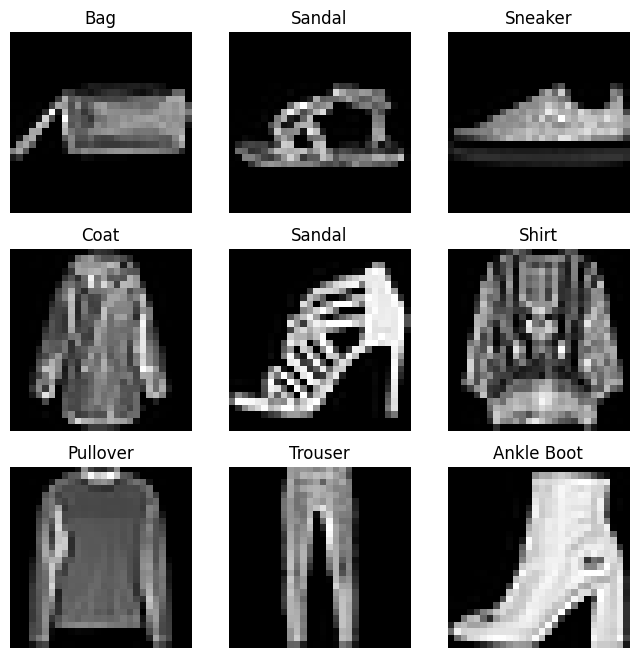

In [ ]:
# Visualizing the dataset

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()

In [ ]:
# Creating a custom dataset
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
# Create and initialize DataLoaders
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: [64, 1, 28, 28]
Labels batch shape: [64]



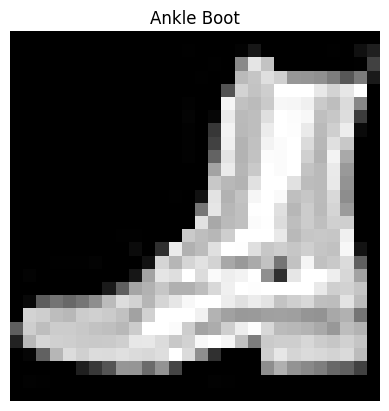

In [ ]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {list(train_features.size())}")
print(f"Labels batch shape: {list(train_labels.size())}\n")

img = train_features[0].squeeze()
label = int(train_labels[0])

plt.title(f'{labels_map[label]}')
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.show()

# **Redes Neurais**
---

Para o treinamento dos modelos, devem ser usados *hardwares* como **GPU** ou **MPS**, caso não seja possível utilizar esses anteriores, utilize a própria **CPU**.

In [ ]:
# Identifying the available device for training
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device.upper()} device")

Using CUDA device


A classe que será a Rede Neural proposta deve ser uma subclasse de `nn.Module` e inicializa-se as camadas da rede a partir da função `__init__`. Após isso, deve ser implementada o método `forward`.

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
# Transfering the Neural Network to the available device
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
# Implementation example for the 'forward' method
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([3], device='cuda:0')


### **Camadas do Modelo**
---

Utilizando uma imagem colorida, com entradas **RGB**, tem-se que as imagens tem a seguinte dimensão: $3 \times 28 \times 28 \space (C \times H \times W)$, no qual $C$ é o número de canais, $H$ é a altura da imagem e $W$ é a largura da imagem.

In [ ]:
# Sample RGB image input
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
# The Flatten() method Converts the 28x28 image into an one-dimensional array of 784 elements
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [ ]:
# nn.Linear is the layer that applies the linear transformation, storing weight and bias
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [ ]:
# nn.ReLU applies the ReLU activation function to all the output values of the network
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.7766,  0.0777,  0.2504,  0.8375, -0.4294,  0.0099,  0.6254,  0.3760,
          0.0500, -0.8845,  0.5603,  0.2520, -0.1434, -0.0032, -0.1374,  0.3987,
          0.3929,  0.3250, -0.2269,  0.1432],
        [ 0.7602,  0.1951,  0.2646,  0.5848, -0.1913,  0.2957,  0.2643,  0.3845,
         -0.1950, -0.6913,  0.7946,  0.4412, -0.3668,  0.1486,  0.0387,  0.1419,
          0.0411,  0.4585, -0.4497,  0.5716],
        [ 0.4964, -0.0274,  0.2821,  0.7817,  0.0022,  0.0791,  0.4879,  0.4410,
         -0.4473, -0.5527,  0.6165, -0.0117,  0.0360,  0.4887, -0.0043,  0.2105,
          0.1325,  0.3302, -0.6401,  0.1812]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.7766, 0.0777, 0.2504, 0.8375, 0.0000, 0.0099, 0.6254, 0.3760, 0.0500,
         0.0000, 0.5603, 0.2520, 0.0000, 0.0000, 0.0000, 0.3987, 0.3929, 0.3250,
         0.0000, 0.1432],
        [0.7602, 0.1951, 0.2646, 0.5848, 0.0000, 0.2957, 0.2643, 0.3845, 0.0000,
         0.0000, 0.7946, 0.4412, 0.0000, 0.1486, 0.03

In [ ]:
# nn.Sequencial is a module that groups all other modules in a linear fashion
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [ ]:
# The Softmax() method maps all values in the interval (-inf, +inf) to [0, 1],
# these values represent each class probability and it's sum is equal to 1.
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [ ]:
# Representing the model's parameters
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0335, -0.0287, -0.0054,  ...,  0.0046,  0.0148, -0.0040],
        [ 0.0193, -0.0222, -0.0243,  ...,  0.0211,  0.0210, -0.0089]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0249, -0.0205], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0087, -0.0098, -0.0422,  ..., -0.0167,  0.0348, -0.0405],
        [ 0.0021,  0.0141,  0.0409,  ...,  0.0001, -0.0395,  0.0370]],
       device='cuda:0', grad_fn=<Sl

### **Autograd**
---

No treinamento das Redes Neurais, os algoritmos de *backpropagation* são utilizados para ajustar os parâmetros dos modelos de acordo com os gradientes da função de perda.

Para computar os gradientes, o **Pytorch** possui uma ferramenta chamada `torch.autograd` que computa os gradientes de qualquer gráfico computacional. O exemplo a seguir mostra a saída dos gradientes.

In [ ]:
x = torch.ones(5) # Input
y = torch.zeros(3) # Expected Output
w = torch.randn(5, 3, requires_grad=True) # Perceprtron with 5 inputs and 3 outputs
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [ ]:
print(f"Gradient function for z = {str(z.grad_fn).split()[0][1:]}")
print(f"Gradient function for loss = {str(loss.grad_fn).split()[0][1:]}")

Gradient function for z = AddBackward0
Gradient function for loss = BinaryCrossEntropyWithLogitsBackward0


In [ ]:
# Computing gradients
loss.backward()
print(f'{w.grad}\n')
print(f'{b.grad}')

tensor([[0.1758, 0.3103, 0.0064],
        [0.1758, 0.3103, 0.0064],
        [0.1758, 0.3103, 0.0064],
        [0.1758, 0.3103, 0.0064],
        [0.1758, 0.3103, 0.0064]])

tensor([0.1758, 0.3103, 0.0064])


## **Treinamento do Modelo**
---

### **Hiperparâmetros**
---

- **Number of Epochs** - Número de vezes que será iterado pelo *Dataset*.
- **Batch Size** - Número de dados utilizados em cada propagação da Rede Neural;
- **Learning Rate** - Fator de aprendizado dos parâmetros do modelo

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### **Treinamento**
---

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute predictions and loss value
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

### **Validação e Teste**
---

In [ ]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to test mode
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are
    # computed during test mode and also serves to reduce unnecessary gradient
    # computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### **Função de Perda**
---

In [ ]:
# Cross Entropy
loss_fn = nn.CrossEntropyLoss()

### **Otimizador**
---

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Por fim, vamos ter que o processo de treinamento pode ser dado pelo código abaixo:

In [ ]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)

print("Done!")

Epoch 1
-------------------------------
loss: 2.311703  [   64/60000]
loss: 2.302251  [ 6464/60000]
loss: 2.285026  [12864/60000]
loss: 2.279605  [19264/60000]
loss: 2.251549  [25664/60000]
loss: 2.224206  [32064/60000]
loss: 2.228502  [38464/60000]
loss: 2.196449  [44864/60000]
loss: 2.197103  [51264/60000]
loss: 2.158158  [57664/60000]
Test Error: 
 Accuracy: 40.8%, Avg loss: 2.159232 

Epoch 2
-------------------------------
loss: 2.170932  [   64/60000]
loss: 2.166889  [ 6464/60000]
loss: 2.111976  [12864/60000]
loss: 2.131218  [19264/60000]
loss: 2.074421  [25664/60000]
loss: 2.018686  [32064/60000]
loss: 2.040284  [38464/60000]
loss: 1.967223  [44864/60000]
loss: 1.974103  [51264/60000]
loss: 1.899280  [57664/60000]
Test Error: 
 Accuracy: 52.7%, Avg loss: 1.899940 

Epoch 3
-------------------------------
loss: 1.937761  [   64/60000]
loss: 1.909693  [ 6464/60000]
loss: 1.796337  [12864/60000]
loss: 1.837930  [19264/60000]
loss: 1.721008  [25664/60000]
loss: 1.682251  [32064/600